# 混淆矩阵

通过测试集所有图像预测结果，生成多类别混淆矩阵，评估模型准确度。

同济子豪兄：https://space.bilibili.com/1900783

[代码运行云GPU环境](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.2

## 设置Matplotlib中文字体

In [12]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [13]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [14]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

# import matplotlib
# matplotlib.rc("font",family='SimHei') # 中文字体


## 导入工具包

In [15]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import math
import cv2

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [16]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


## 载入测试集预测结果表格

In [17]:
df = pd.read_csv('测试集预测结果.csv')

In [18]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
0,..\..\data\fruit30_split\val\哈密瓜\106.jpg,0,哈密瓜,4,柚子,0,哈密瓜,5,柠檬,True,...,3.521001e-07,0.000002,2.254164e-06,0.000002,5.554669e-07,0.000134,1.167948e-05,3.926038e-06,0.000038,1.814037e-07
1,..\..\data\fruit30_split\val\哈密瓜\109.jpg,0,哈密瓜,0,哈密瓜,6,桂圆,8,椰子,True,...,2.910540e-07,0.000013,7.039090e-07,0.001405,2.569432e-05,0.000182,2.765986e-07,1.779288e-05,0.001001,4.129508e-06
2,..\..\data\fruit30_split\val\哈密瓜\114.jpg,0,哈密瓜,0,哈密瓜,26,西红柿,2,山竹,True,...,4.027732e-03,0.008897,3.352876e-04,0.005858,1.932197e-03,0.000411,1.927615e-02,2.409854e-04,0.003670,1.477481e-04
3,..\..\data\fruit30_split\val\哈密瓜\116.jpg,0,哈密瓜,0,哈密瓜,16,芒果,9,榴莲,True,...,1.913530e-05,0.000344,1.499393e-05,0.000124,1.947595e-07,0.000130,5.474818e-05,2.550467e-07,0.009668,8.494197e-05
4,..\..\data\fruit30_split\val\哈密瓜\118.png,0,哈密瓜,4,柚子,11,猕猴桃,0,哈密瓜,True,...,1.959296e-03,0.000070,4.301105e-05,0.016771,3.243645e-05,0.000834,6.195806e-04,1.078881e-07,0.001307,2.273609e-04


## 生成混淆矩阵

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix_model = confusion_matrix(df['标注类别名称'], df['top-1-预测名称'])

In [21]:
confusion_matrix_model.shape

(30, 30)

In [22]:
confusion_matrix_model

array([[33,  0,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 1,  0,  0,  0, 31,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 34,  0,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0, 28,  

## 可视化混淆矩阵

In [39]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.xlabel('预测类别', fontsize=25, c='b')
    plt.ylabel('真实类别', fontsize=25, c='b')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 # color="white",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

In [24]:
# 查看所有配色方案
# dir(plt.cm)

In [25]:
# 子豪兄精选配色方案
# Blues
# BuGn
# Reds
# Greens
# Greys
# binary
# Oranges
# Purples
# BuPu
# GnBu
# OrRd
# RdPu

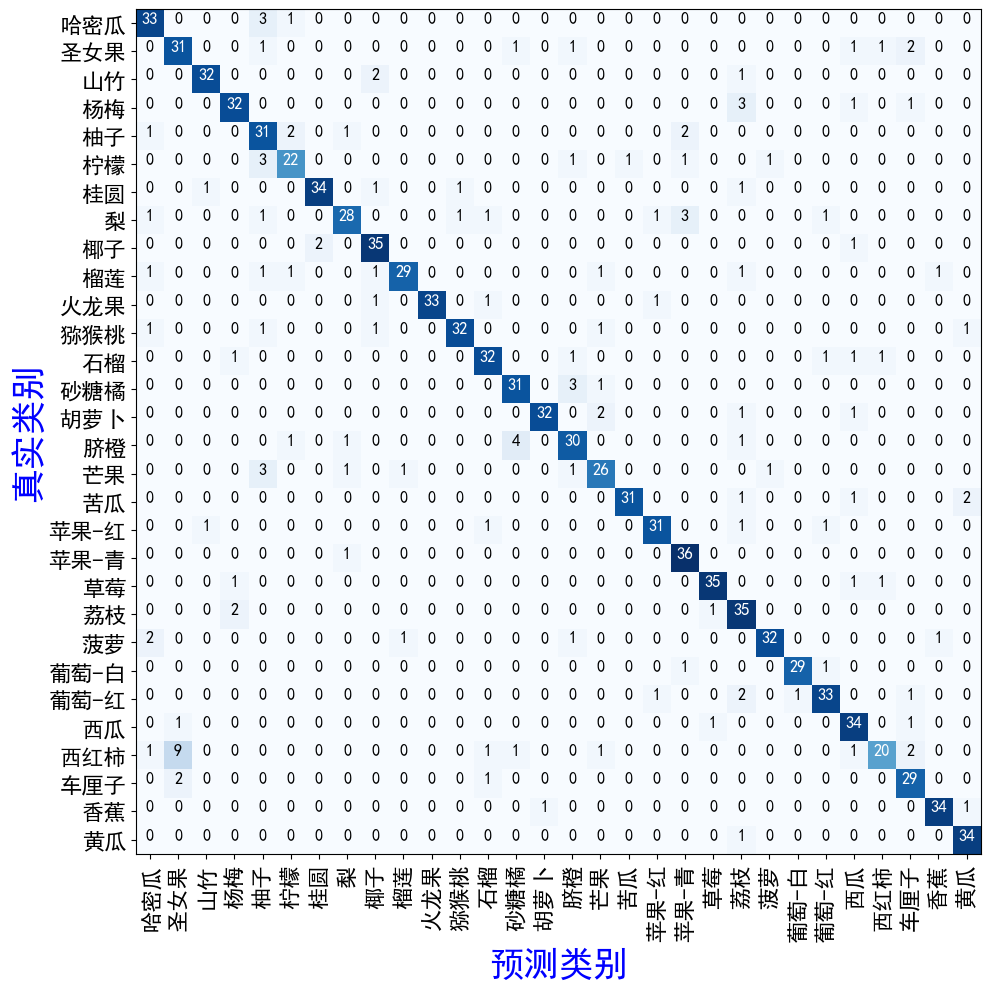

In [40]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

## 筛选出测试集中，真实为A类，但被误判为B类的图像

In [27]:
true_A = '荔枝'
pred_B = '杨梅'

In [28]:
wrong_df = df[(df['标注类别名称']==true_A)&(df['top-1-预测名称']==pred_B)]

In [29]:
wrong_df

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
762,..\..\data\fruit30_split\val\荔枝\113.jpg,21,荔枝,3,杨梅,21,荔枝,2,山竹,True,...,0.000372,0.226622,0.000001,0.000022,0.003289,0.000067,0.000441,0.00303,0.000063,7.414473e-06
795,..\..\data\fruit30_split\val\荔枝\91.jpeg,21,荔枝,3,杨梅,21,荔枝,20,草莓,True,...,0.011549,0.314185,0.000003,0.000002,0.000145,0.000036,0.000058,0.00001,0.000001,7.680859e-09


## 可视化上表中所有被误判的图像

In [30]:
for idx, row in wrong_df.iterrows():
    img_path = row['图像路径']
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    title_str = img_path + '\nTrue:' + row['标注类别名称'] + ' Pred:' + row['top-1-预测名称']
    plt.title(title_str)
    plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
